#*1. Importing all the libraries, NumPy, Seaborn, Pandas and Matplotlib*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#dataset_path - '/content/SMSSpamCollection'

In [ ]:
#importing natural language toolkit
import nltk
from nltk import word_tokenize
import string, re  #regular expession
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Websites
# 8. Deployments

In [ ]:
#!unzip "/content/drive/MyDrive/Data-Science Edureka/Data Science New Project /Email Classification/SMS Spam/sms+spam+collection.zip"

### **2. Data Cleaning**

In [ ]:
data = pd.read_csv("/content/SMSSpamCollection",  sep = "\t", header = None)
data.rename(columns =  {0:'Category', 1:"Email Text"}, inplace = True)  # rename columns name
data

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.info()
#Hence we can see that there in null objects present in the Category and Email, text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Email Text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isnull().sum()
#null values are 0.
#data type is integer

Category      0
Email Text    0
dtype: int64

In [ ]:
data.duplicated().sum()

403

In [ ]:
#It's is used to delete the same tuye of the value
data = data.drop_duplicates(keep = 'first')

In [ ]:
#After deleting checking that if there is any duplicate value is available or not
data.duplicated().sum()

0

In [ ]:
#Reseting the index after deleting and checking the present of duplicate value in the dataset
data = data.reset_index(drop = True)
data

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will ü b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#Checking the shape of the dataset  Rows*columns
data.shape

(5169, 2)

###**3. EDA - Exploratory Data Analysis**



In [ ]:
#Legitimate or desired message
print(f"Email Not Spam : {round(data['Category'].value_counts()[0] / len(data) * 100, 2)} %")
print(f"Spam Email : {round(data['Category'].value_counts()[1] / len(data) * 100 , 2)} %")

Email Not Spam : 87.37 %
Spam Email : 12.63 %


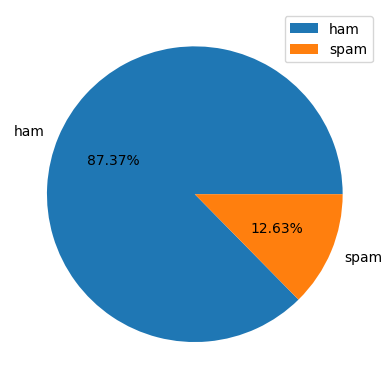

In [ ]:
#Pie plot of the Spam and ham catogory
plt.pie(data['Category'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%");
plt.legend();

In [ ]:
data['num_characters'] = data['Email Text'].apply(len)
data.head(10)

,Category,Email Text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [ ]:
data['num_words'] = data['Email Text'].apply(lambda x : len(nltk.word_tokenize(x)))
#tokenize it into a list of word and calculate the length of that list
data.head()

,Category,Email Text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
data['num_sent'] = data['Email Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head()

,Category,Email Text,num_characters,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data.describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham category describe
data[data['Category'] == 'ham'].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Spam category describe
data[data['Category'] == 'spam'].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
data.corr()
#resulting matrix show how strongly each variable is correlated with every oterh variable. The value range is from -1, 1

<ipython-input-217-2471ddbf5fd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,num_characters,num_words,num_sent
num_characters,1.000000,0.966003,0.622580
num_words,0.966003,1.000000,0.679142
num_sent,0.622580,0.679142,1.000000


<ipython-input-218-c668324431c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)  #correlation matrix of the datafrme


<Axes: >

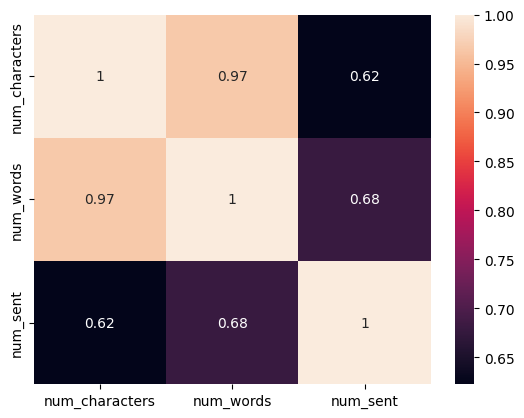

In [ ]:
sns.heatmap(data.corr(), annot = True)  #correlation matrix of the datafrme

## **4. Data Preprocessing**


####Glimpse that how the stemmer and Lemmatization work

In [ ]:
import nltk
import spacy
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]
for word in words:
  print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


###Lemmetization

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("eating eats eat ate adjustable rafting ability meeting")
for token in doc:
    print(token, "|", token.lemma_)

eating | eat
eats | eat
eat | eat
ate | eat
adjustable | adjustable
rafting | raft
ability | ability
meeting | meeting


In [ ]:
#that why Lemmantizer is more sophisticated and correct.
#If we're taking about stemmer, it's only work on ing king of word, not in much correct details of the grammer.
#in case of Lammantizer we can see that it's linguistic based knowledge

In [ ]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
# Create a function to generate cleaned data from raw text
def clean_text(text):
    text = word_tokenize(text) # Create tokens
    text= " ".join(text) # Join tokens
    text = [char for char in text if char not in string.punctuation] # Remove punctuations
    text = ''.join(text) # Join the leters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)] # Remove Numbers
    text = ''.join(text) # Join the leters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common english words (I, you, we,...)
    text = ' '.join(text) # Join the leters
    # text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)   # error word

In [ ]:
#cleaning the text

In [ ]:
data['Clean Email'] = data['Email Text'].apply(clean_text)

In [ ]:
data.columns  # printing the data column

Index(['Category', 'Email Text', 'num_characters', 'num_words', 'num_sent',
       'Clean Email'],
      dtype='object')

In [ ]:
data.head(4)

,Category,Email Text,num_characters,num_words,num_sent,Clean Email
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [ ]:
from wordcloud import WordCloud #Visually represent frequency of words in word cloud
wc = WordCloud(width = 2000, height = 1000, min_font_size = 10, background_color = 'Black')

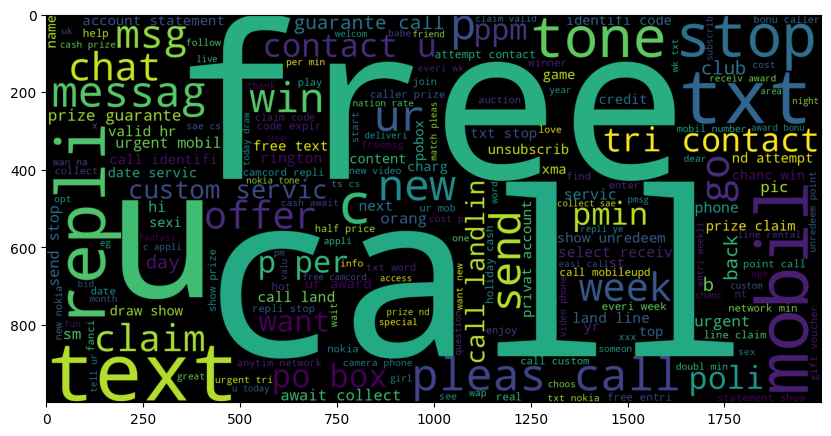

In [ ]:
spam_ = wc.generate(data[data['Category']=='spam']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (10,6))
plt.imshow(spam_);

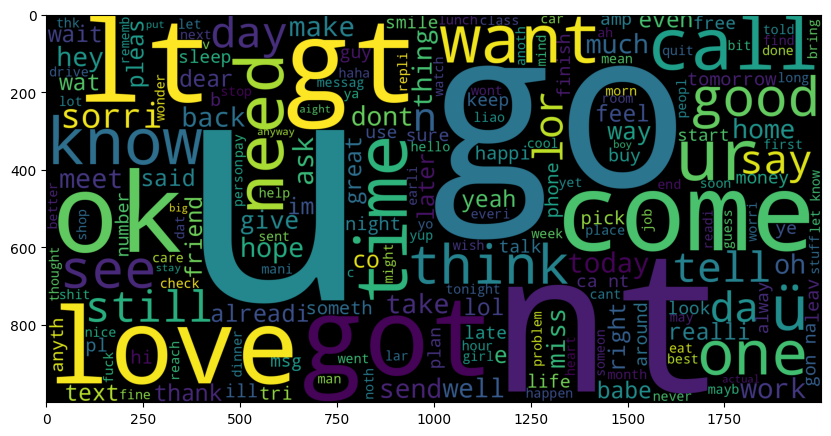

In [ ]:
ham_ = wc.generate(data[data['Category']=='ham']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (10, 8))
plt.imshow(ham_);

In [ ]:
spam_word = []
for msg in data[data['Category'] == 'spam']['Clean Email'].tolist():
  for word in msg.split():
    spam_word.append(word)

In [ ]:
len(spam_word)

9553

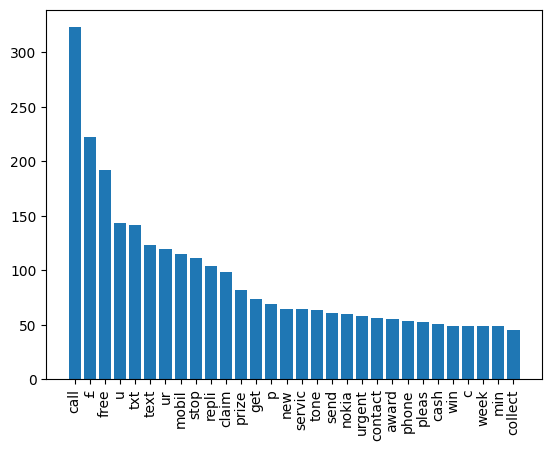

In [ ]:
from collections import Counter # Count- Occurance of  element in a collection
#ploting bar graph of the spam email
plt.bar(pd.DataFrame(Counter(spam_word).most_common(30))[0], pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [ ]:
ham_word = []
for msg in data[data['Category'] == 'ham']['Clean Email'].tolist():
  for word in msg.split():
    ham_word.append(word)

In [ ]:
len(ham_word)

36329

In [ ]:
#Occurance of word in collection

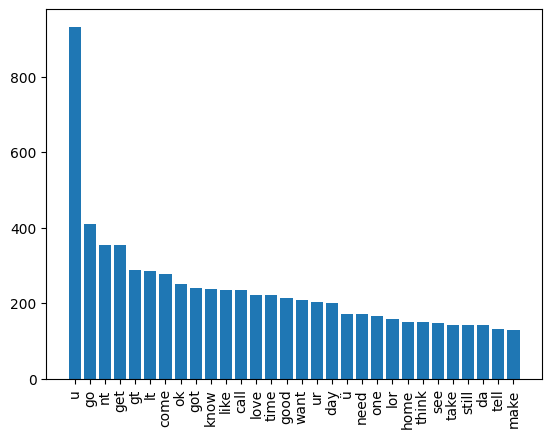

In [ ]:
from collections import Counter
#bar graph for the ham words
plt.bar(pd.DataFrame(Counter(ham_word).most_common(30))[0], pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [ ]:
from sklearn.preprocessing import LabelEncoder
#ecoding categorical label into numerical label values.
# Initialize the LabelEncoder
encoder = LabelEncoder()
# Fit and transform the labels
data['target'] = encoder.fit_transform(data['Category'])

### **5. Model Building**

In [ ]:
#Tfidf-Term frequecy and inverse document frequency
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer

In [ ]:
# Initialize the TF-IDF vectorizer
tf = TfidfVectorizer(max_features = 3000)

# Fit and transform the text column
X = tf.fit_transform(data['Clean Email']).toarray()
X.shape

(5169, 3000)

In [ ]:
y = data['target'].values
#Here x is a feature matrix and y is the target matrix

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

###**6.Training the model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
#It's used to split the data into train and test


###**7.Evaluation Phase**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss

In [ ]:
gnb = GaussianNB() #It's commanly used when features are continuous
mnb = MultinomialNB()  #When features are discrete
bnb = BernoulliNB()  #suitable for binary/boolean feature

In [ ]:
gnb.fit(X_train, y_train)  #gaussianNB
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.8607350096711799
[[788 120]
 [ 24 102]]
Precision Score 0.4594594594594595


In [ ]:
mnb.fit(X_train, y_train) #multinominalNB
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")
#best accuracy

Accuracy Score: 0.9709864603481625
[[908   0]
 [ 30  96]]
Precision Score 1.0


In [ ]:
bnb.fit(X_train, y_train) #bernoulliNB
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9796905222437138
[[906   2]
 [ 19 107]]
Precision Score 0.981651376146789


In [ ]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [ ]:
sms = "“We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund.”"

In [ ]:
tf_idf = pickle.load(open("/content/vectorizer.pkl", 'rb'))
model = pickle.load(open("/content/model.pkl", 'rb'))

In [ ]:
#Preprocess
transformed_sms = clean_text(sms)
#Vectorize
vect_input = tf_idf.transform([transformed_sms])
result = model.predict(vect_input)[0] #predict

In [ ]:
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Spam


###**Predicting for the Multiple Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
models = []
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()) )
models.append((('Decision Tree Classifier', DecisionTreeClassifier())))
models.append(('Naive bayes', MultinomialNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))

In [ ]:
models

[('Random Forest Classifier', RandomForestClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Naive bayes', MultinomialNB()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('Support Vector Machine', SVC())]

In [ ]:
#Multiple Evaluation parameter
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)

df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})

In [ ]:
df = df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)
df

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive bayes,97.10,100.00,76.19,86.49
1,KNeighborsClassifier,91.88,100.00,33.33,50.00
2,Support Vector Machine,97.29,99.00,78.57,87.61
3,Logistic Regression,95.16,97.50,61.90,75.73
4,Random Forest Classifier,97.10,97.06,78.57,86.84
5,Decision Tree Classifier,94.68,78.86,76.98,77.91


In [ ]:
df = df.sort_values(by = 'F1 Score', ascending = False).reset_index(drop = True)
#All Evaluation of algo are present here in the same table

In [ ]:
df

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,97.29,99.00,78.57,87.61
1,Naive bayes,97.10,100.00,76.19,86.49
2,Random Forest Classifier,97.00,97.03,77.78,86.34
3,Decision Tree Classifier,94.87,81.74,74.60,78.01
4,Logistic Regression,95.16,97.50,61.90,75.73
5,KNeighborsClassifier,91.88,100.00,33.33,50.00


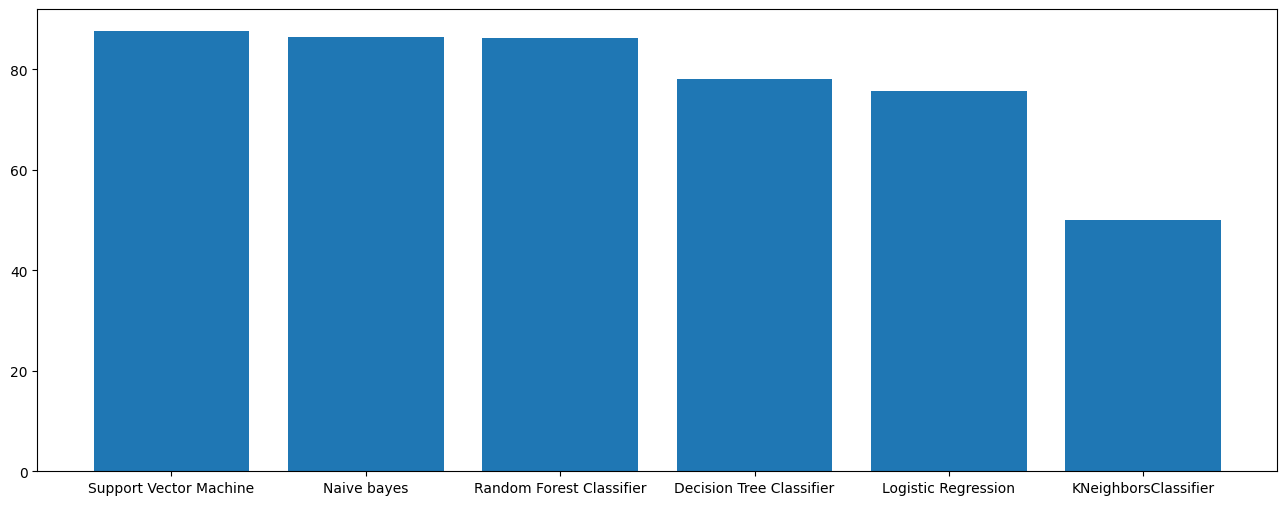

In [ ]:
#Final visualization
plt.figure(figsize = (16,6))
plt.bar(df['Model'],df['F1 Score']);